На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

Разница между группами статистически не значима, мощность теста небольшая. Для определения корректных результатов необходимо провести повторный тест с достаточной мощностью.

In [65]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')


In [66]:
df = pd.read_excel('AB_Test_Results.xlsx')
df.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
1,2423,control,0.00
2,9411,control,0.00
3,7311,control,0.00
4,6174,variant,0.00
5,2380,variant,0.00
6,2849,control,0.00
7,9168,control,0.00
8,6205,variant,0.00
9,7548,control,0.00


In [67]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
1,2423,control,0.00
2,9411,control,0.00
3,7311,control,0.00
4,6174,variant,0.00
...,...,...,...
9995,1981,control,0.00
9996,502,variant,0.00
9997,9214,variant,0.00
9998,7741,control,0.00


In [68]:
df.shape

(10000, 3)

In [69]:
df.describe()

,USER_ID,REVENUE
count,"10,000.00","10,000.00"
mean,"4,981.08",0.10
std,"2,890.59",2.32
min,2.00,0.00
25%,"2,468.75",0.00
50%,"4,962.00",0.00
75%,"7,511.50",0.00
max,"10,000.00",196.01


In [70]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [71]:
new_df = df[df['REVENUE'] > 0]
new_df

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


In [72]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [73]:
df.USER_ID.nunique()

6324

In [74]:
df = df.groupby(['USER_ID', 'VARIANT_NAME'], as_index=False).agg({'REVENUE': 'sum'})

In [75]:
df.shape

(7865, 3)

In [76]:
df.groupby('USER_ID', as_index=False).agg({'VARIANT_NAME': 'count'})['VARIANT_NAME'].value_counts()

1    4783
2    1541
Name: VARIANT_NAME, dtype: int64

In [77]:
unique_ids = \
(df
 .groupby('USER_ID', as_index=False)
 .agg({'VARIANT_NAME': 'count'})
 .query('VARIANT_NAME == 1')
 .USER_ID
 .values
 )

In [78]:
df_new = df[df.USER_ID.isin(unique_ids)].copy(deep=True)

In [79]:
df_new.shape

(4783, 3)

In [80]:
df_new.describe()

,USER_ID,REVENUE
count,"4,783.00","4,783.00"
mean,"4,994.40",0.14
std,"2,898.62",3.01
min,2.00,0.00
25%,"2,476.00",0.00
50%,"4,975.00",0.00
75%,"7,515.00",0.00
max,"9,998.00",196.01


In [81]:
control = df_new.query('VARIANT_NAME == "control"')
test = df_new.query('VARIANT_NAME == "variant"')

In [82]:
alpha = 0.05

st = shapiro(df.REVENUE)
print('Discription is {}normal\n'.format( {True: 'not ',
False: ''}[st[1] < alpha]))

Discription is not normal



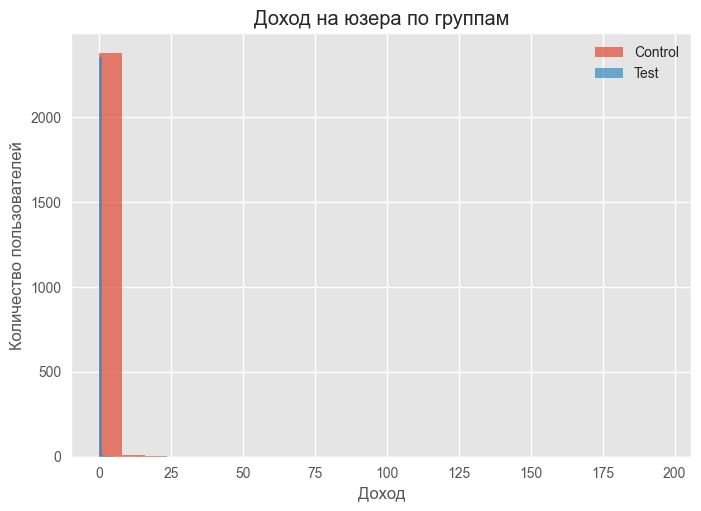

In [83]:
control.REVENUE.hist(bins = 25, alpha = 0.7, label = 'Control')
test.REVENUE.hist(bins = 25, alpha = 0.7, label = 'Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Количество пользователей')
plt.legend();

In [84]:
mw_stats = scipy.stats.mannwhitneyu(x=control.REVENUE.values, y = test.REVENUE.values)
mw_stats

MannwhitneyuResult(statistic=2874161.0, pvalue=0.2104875008271777)

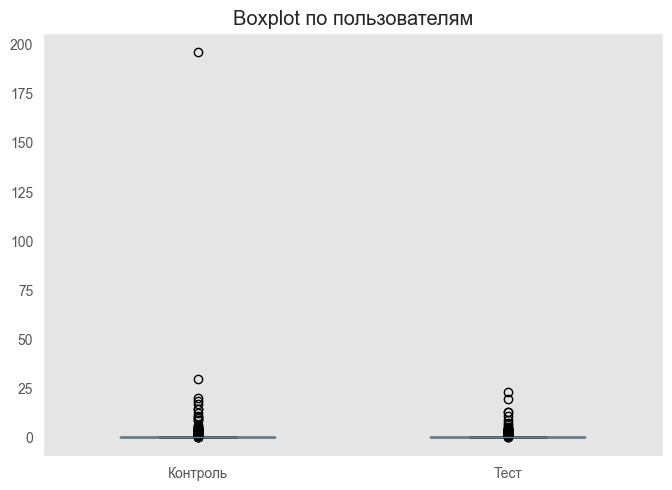

In [85]:
plt.boxplot([control.REVENUE, test.REVENUE],
            labels = ['Контроль', 'Тест'],
            widths = 0.5
            )
plt.title('Boxplot по пользователям', loc='center')
plt.grid(axis='both')

In [86]:
stats.ttest_ind(control.REVENUE.values, test.REVENUE.values, equal_var = False)

Ttest_indResult(statistic=1.3996978409515475, pvalue=0.16172355638776942)

Метрика визиты на юзера

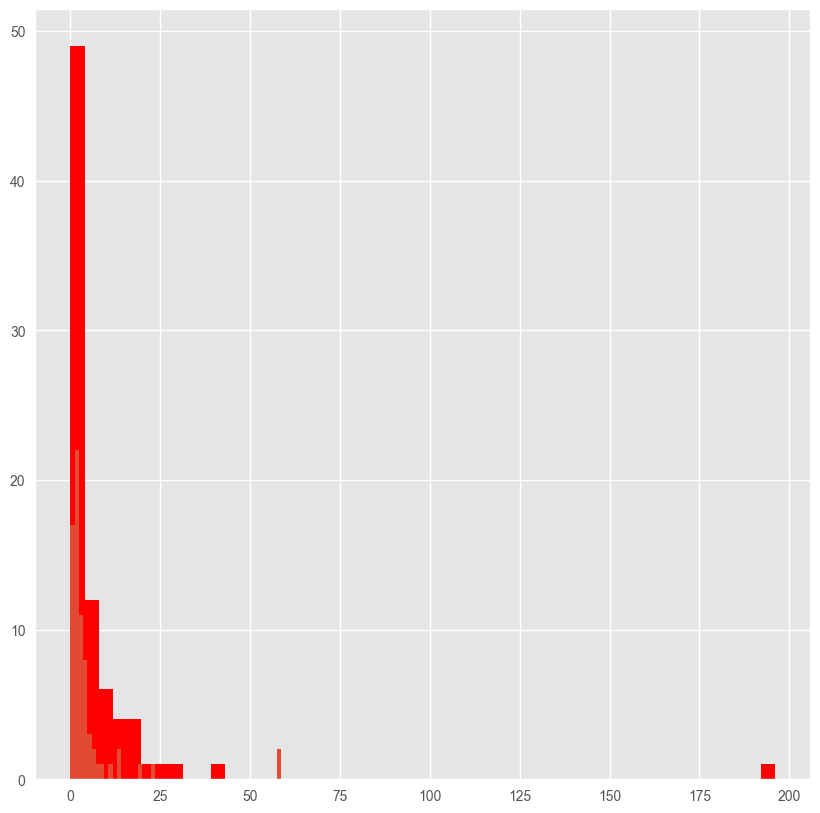

In [87]:
plt.figure(figsize=(10, 10))
control_visit_all = new_data['REVENUE'][data['VARIANT_NAME']=='control']
test_visit_all = new_data['REVENUE'][data['VARIANT_NAME']=='variant']

plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all, bins=50)

plt.show()

In [88]:
ttest_ind(control_visit_all, test_visit_all, equal_var = False)

Ttest_indResult(statistic=1.1379124979933528, pvalue=0.25760685398932337)

pvalue > 0.05 Значимых изменений нет

Мощность теста

In [89]:
C_mean = control.REVENUE.values.mean()
T_mean = test.REVENUE.values.mean()

C_std = control.REVENUE.values.std()
T_std = test.REVENUE.values.std()

print(len(control.REVENUE.values), len(test.REVENUE.values))

2390 2393


In [90]:
n = len(control.REVENUE.values)     
S = np.sqrt((T_std**2 +C_std**2)/2)     
ef = float((C_mean-T_mean)/S)

alpha = 0.05
analysis = TTestIndPower()
analysis = sm.stats.power.TTestIndPower()
result = analysis.solve_power(ef, power=None,
                              nobs1=n, ratio=1.0, alpha=alpha)

result

0.2880309627335733

Разница между группами статистически не значима, мощность теста небольшая. Для определения корректных результатов необходимо провести повторный тест с достаточной мощностью.